# **Imports**

In [861]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [862]:
df = pd.read_csv('../data/train-set.csv')
df

,CustomerID,Gender,Married,Age,Graduated,Profession,WorkExperience,SpendingScore,FamilySize,Category,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Category 4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Category 4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Category 6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Category 6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Category 6,A
...,...,...,...,...,...,...,...,...,...,...,...
8063,464018,Male,No,22,No,NaN,0.0,Low,7.0,Category 1,D
8064,464685,Male,No,35,No,Executive,3.0,Low,4.0,Category 4,D
8065,465406,Female,No,33,Yes,Healthcare,1.0,Low,1.0,Category 6,D
8066,467299,Female,No,27,Yes,Healthcare,1.0,Low,4.0,Category 6,B


Dropping 'CustomerID' column

In [863]:
df = df.drop(['CustomerID'], axis=1)

In [864]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          8068 non-null   object 
 1   Married         7928 non-null   object 
 2   Age             8068 non-null   int64  
 3   Graduated       7990 non-null   object 
 4   Profession      7944 non-null   object 
 5   WorkExperience  7239 non-null   float64
 6   SpendingScore   8068 non-null   object 
 7   FamilySize      7733 non-null   float64
 8   Category        7992 non-null   object 
 9   Segmentation    8068 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 630.4+ KB


# **Numerical columns overview**

In [865]:
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
num_cols

Index(['Age', 'WorkExperience', 'FamilySize'], dtype='object')

In [866]:
df.describe()

,Age,WorkExperience,FamilySize
count,8068.000000,7239.000000,7733.000000
mean,43.466906,2.641663,2.850123
std,16.711696,3.406763,1.531413
min,18.000000,0.000000,1.000000
25%,30.000000,0.000000,2.000000
50%,40.000000,1.000000,3.000000
75%,53.000000,4.000000,4.000000
max,89.000000,14.000000,9.000000


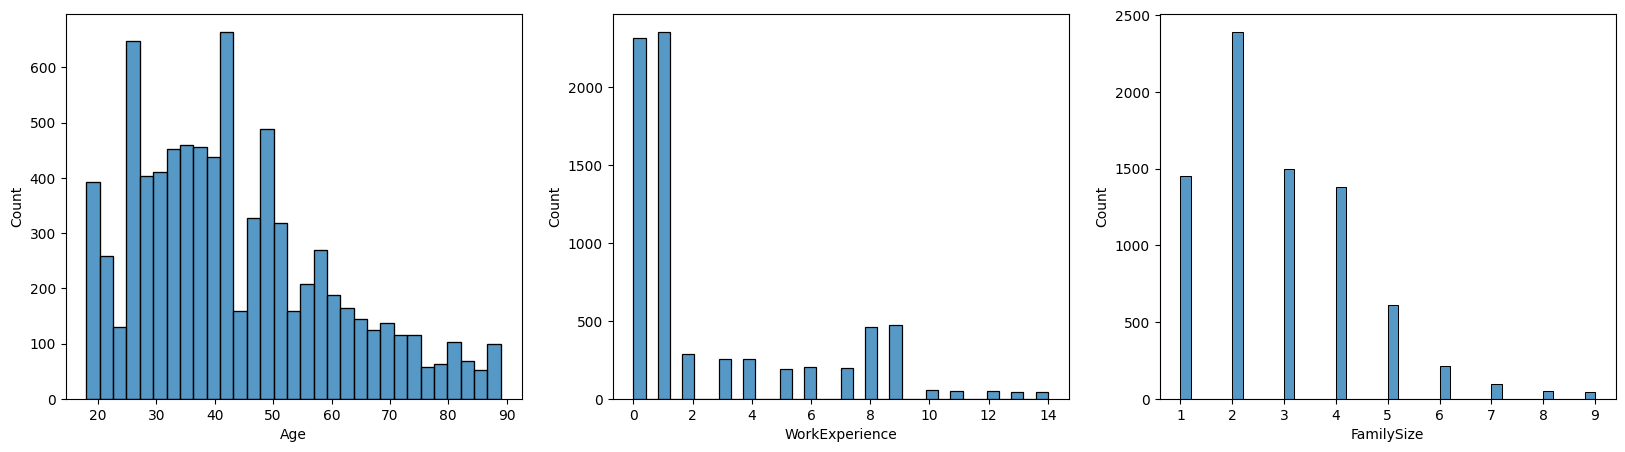

In [867]:
fig, axes = plt.subplots(1, 3, figsize=(20, 5))

for i in range(len(num_cols)):
    sns.histplot(df[num_cols[i]], ax=axes[i])
plt.show()

# **Categorical columns overview**

In [868]:
cat_cols = df.select_dtypes(include=['object']).columns[:-1]
cat_cols

Index(['Gender', 'Married', 'Graduated', 'Profession', 'SpendingScore',
       'Category'],
      dtype='object')

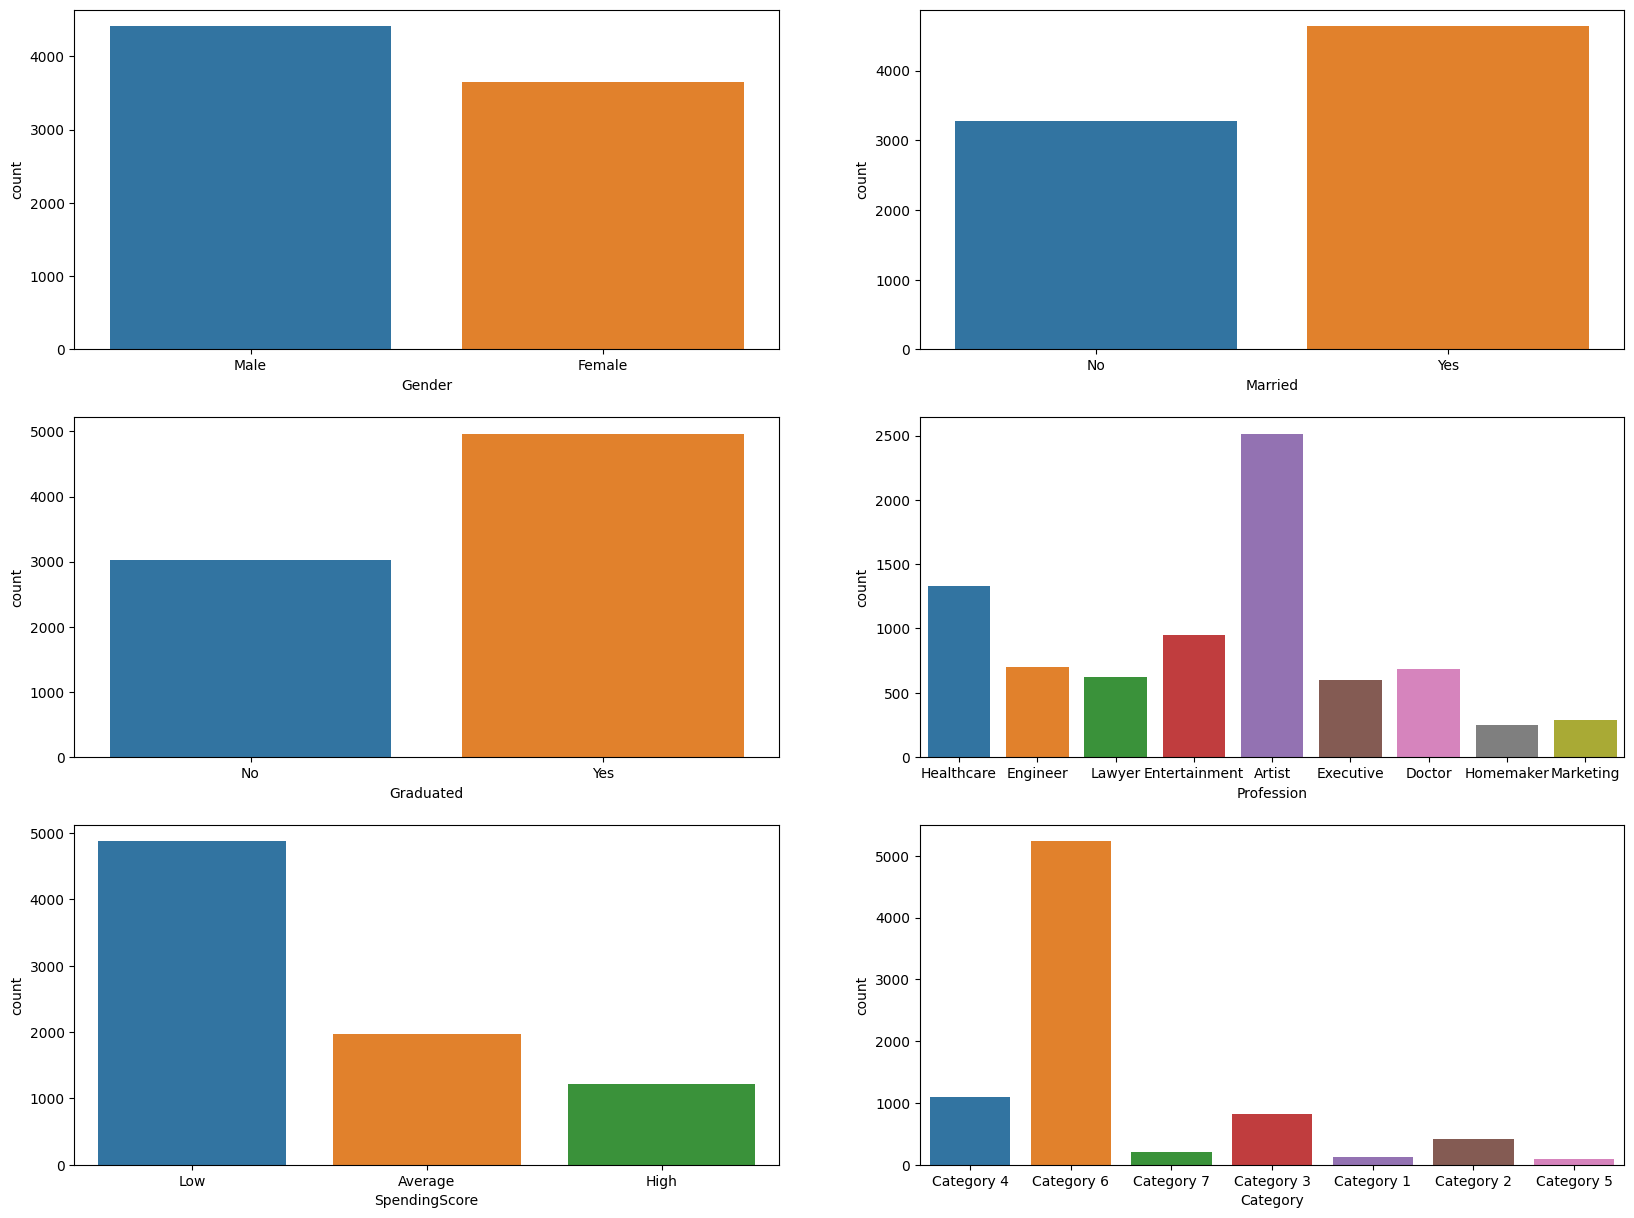

In [869]:
fig, axes = plt.subplots(math.ceil(len(cat_cols)/ 2), 2, figsize=(20, 15))

for i in range(len(cat_cols)):
    col = cat_cols[i]
    sns.countplot(x=col, data=df, ax=axes[math.floor(i/2), i%2], hue=col, legend=False)
plt.show()


# **Missing values**

In [870]:
df.isnull().sum()

Gender              0
Married           140
Age                 0
Graduated          78
Profession        124
WorkExperience    829
SpendingScore       0
FamilySize        335
Category           76
Segmentation        0
dtype: int64

<Axes: >

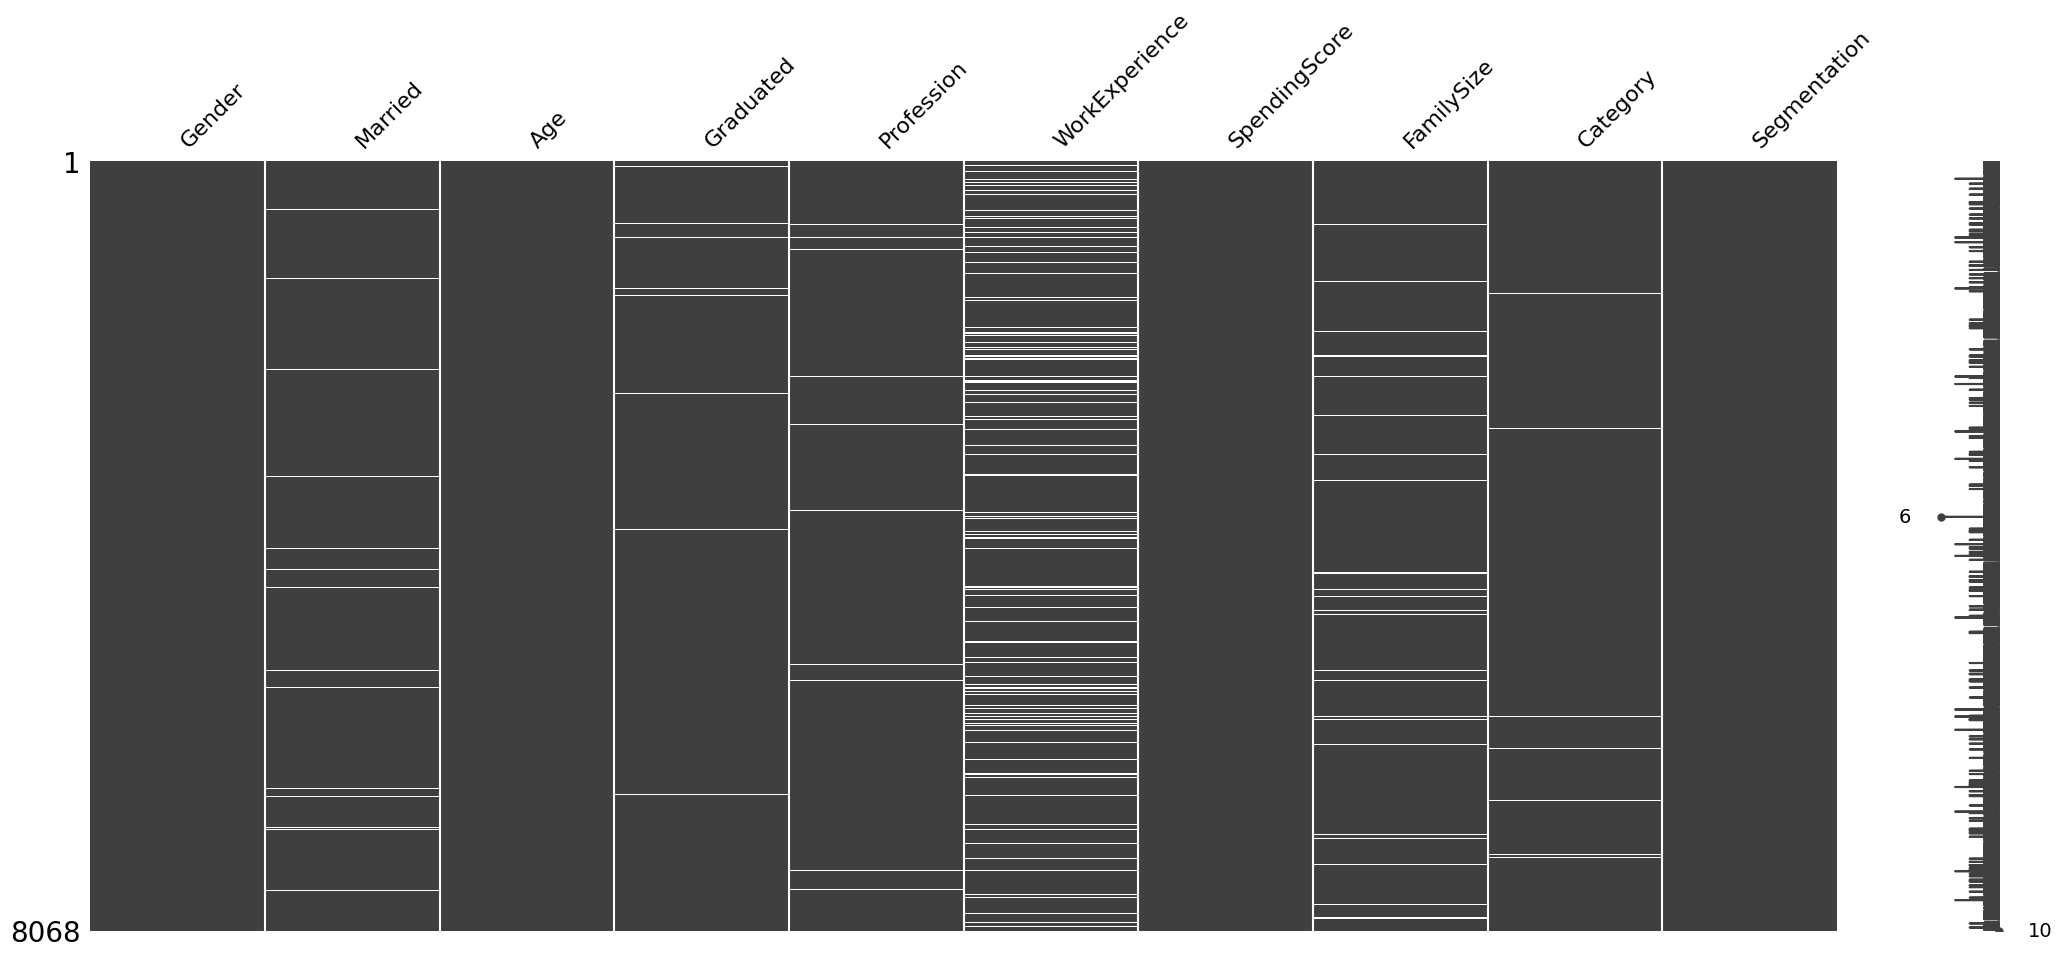

In [871]:
msno.matrix(df)

%

In [872]:
(df.isnull().sum()/len(df))*100

Gender             0.000000
Married            1.735250
Age                0.000000
Graduated          0.966782
Profession         1.536936
WorkExperience    10.275161
SpendingScore      0.000000
FamilySize         4.152206
Category           0.941993
Segmentation       0.000000
dtype: float64

* *Profession* - missing values can be interpreted as *unemployed*
* *WorkExperience* - can be filled in based on age and/or spending score
* Columns with low *%* can be dropped

### Removing column rows with a low percentage

In [873]:
columns_to_drop = ['Married', 'Graduated', 'Profession','FamilySize','Category']

df = df.dropna(subset=columns_to_drop)
df

,Gender,Married,Age,Graduated,Profession,WorkExperience,SpendingScore,FamilySize,Category,Segmentation
0,Male,No,22,No,Healthcare,1.0,Low,4.0,Category 4,D
1,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Category 4,A
2,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Category 6,B
3,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Category 6,B
4,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Category 6,A
...,...,...,...,...,...,...,...,...,...,...
8062,Male,Yes,41,Yes,Artist,0.0,High,5.0,Category 6,B
8064,Male,No,35,No,Executive,3.0,Low,4.0,Category 4,D
8065,Female,No,33,Yes,Healthcare,1.0,Low,1.0,Category 6,D
8066,Female,No,27,Yes,Healthcare,1.0,Low,4.0,Category 6,B


### Handling *WorkExperience*

In [874]:
df['WorkExperience'].isna().sum()

711

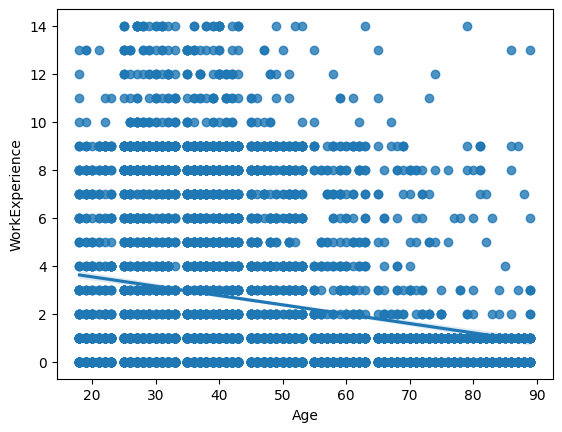

In [875]:
sns.regplot(data=df, x='Age', y='WorkExperience')
plt.show()

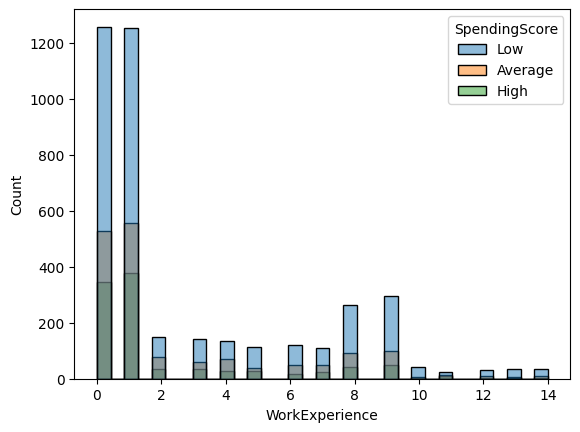

In [876]:
sns.histplot(data=df, x='WorkExperience', hue='SpendingScore')
plt.show()

In [877]:
for i, row in df.iterrows():
    if np.isnan(df.loc[i, 'WorkExperience']):
        df.loc[i, "WorkExperience"] = round(df[ (df['Age'] == row['Age']) ]['WorkExperience'].mean() ,2)

In [878]:
(df.isnull().sum()/len(df))*100

Gender            0.0
Married           0.0
Age               0.0
Graduated         0.0
Profession        0.0
WorkExperience    0.0
SpendingScore     0.0
FamilySize        0.0
Category          0.0
Segmentation      0.0
dtype: float64

# **Outliers**

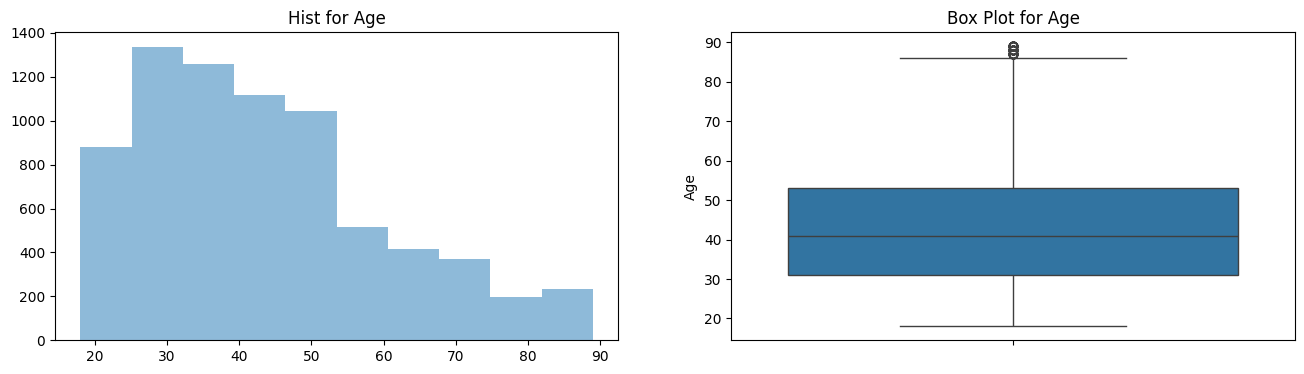

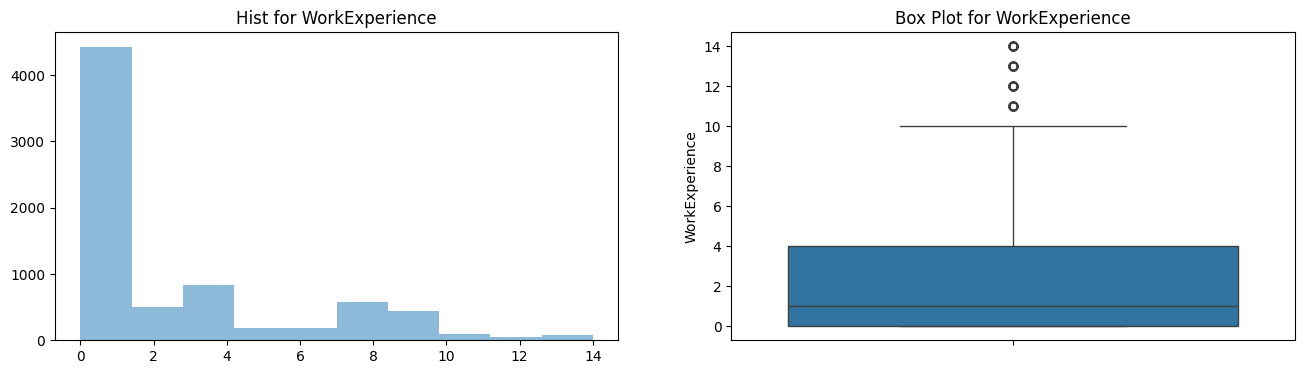

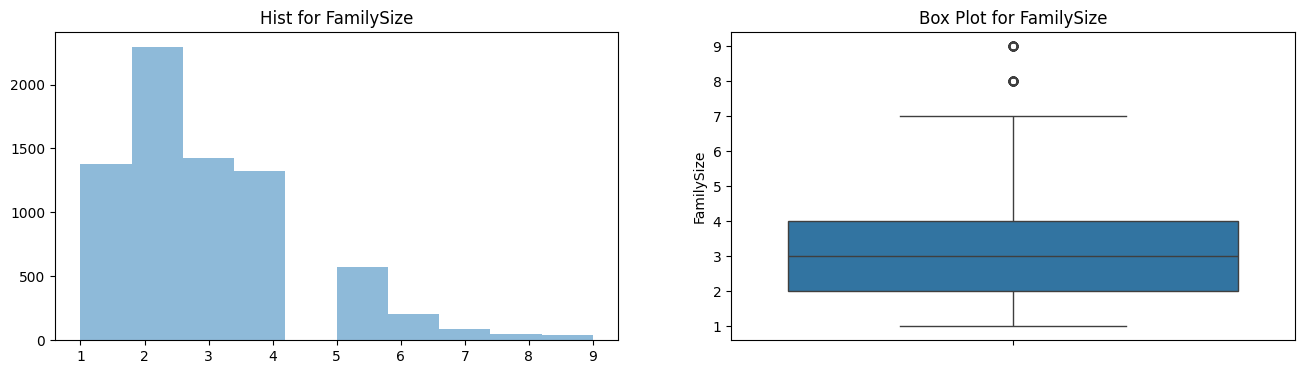

In [879]:
for column in df.select_dtypes(include=['number']):
    plt.figure(figsize=(16, 4))
    plt.subplot(1,2,1)
    plt.title(f'Hist for {column}')
    plt.hist(df[column], alpha=0.5)
    plt.subplot(1,2,2)
    plt.title(f'Box Plot for {column}')
    sns.boxplot(df[column])
    plt.show()

In [880]:
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    upper_limit = Q3 + 1.5 * IQR
    lower_limit = Q1 - 1.5 * IQR

    print(f'{col}: {((df[col] < lower_limit) | (df[col] > upper_limit)).sum()}')
    df = df[df[col] < upper_limit]
   

Age: 88
WorkExperience: 174
FamilySize: 84


In [891]:
df.shape

(6864, 24)

# **Encoding**

Boolean

In [882]:
df['Married'] = df['Married'].map({'Yes': 1, 'No': 0})
df['Graduated'] = df['Graduated'].map({'Yes': 1, 'No': 0})
df['Gender'] = df['Gender'].map({'Female': 1, 'Male': 0})

Ordinal encoding

In [883]:
df['SpendingScore'] = df['SpendingScore'].map({'Low': 0, 'Average': 1, 'High':2})


One Hot encoding

In [884]:
from sklearn.preprocessing import OneHotEncoder

cols = ['Profession', 'Category']
oh_encoder = OneHotEncoder()

codes = oh_encoder.fit_transform(df[cols]).toarray()
feature_names = oh_encoder.get_feature_names_out(cols)


df = pd.concat([
    pd.DataFrame(codes, columns=feature_names).astype(int).reset_index(drop=True),
        df.drop(cols, axis=1).reset_index(drop=True)
    ], axis=1)

Result

In [885]:
df

,Profession_Artist,Profession_Doctor,Profession_Engineer,Profession_Entertainment,Profession_Executive,Profession_Healthcare,Profession_Homemaker,Profession_Lawyer,Profession_Marketing,Category_Category 1,...,Category_Category 6,Category_Category 7,Gender,Married,Age,Graduated,WorkExperience,SpendingScore,FamilySize,Segmentation
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,22,0,1.00,0,4.0,D
1,0,0,1,0,0,0,0,0,0,0,...,0,0,1,1,38,1,3.35,1,3.0,A
2,0,0,1,0,0,0,0,0,0,0,...,1,0,1,1,67,1,1.00,0,1.0,B
3,0,0,0,0,0,0,0,1,0,0,...,1,0,0,1,67,1,0.00,2,2.0,B
4,0,0,0,1,0,0,0,0,0,0,...,1,0,1,1,40,1,3.77,2,6.0,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6859,1,0,0,0,0,0,0,0,0,0,...,1,0,0,1,41,1,0.00,2,5.0,B
6860,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,35,0,3.00,0,4.0,D
6861,0,0,0,0,0,1,0,0,0,0,...,1,0,1,0,33,1,1.00,0,1.0,D
6862,0,0,0,0,0,1,0,0,0,0,...,1,0,1,0,27,1,1.00,0,4.0,B


# **Scaling**

In [886]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

cols = df.columns[df.columns != 'Segmentation']
df[cols] = scaler.fit_transform(df[cols])

df

,Profession_Artist,Profession_Doctor,Profession_Engineer,Profession_Entertainment,Profession_Executive,Profession_Healthcare,Profession_Homemaker,Profession_Lawyer,Profession_Marketing,Category_Category 1,...,Category_Category 6,Category_Category 7,Gender,Married,Age,Graduated,WorkExperience,SpendingScore,FamilySize,Segmentation
0,-0.703170,-0.312029,-0.311185,-0.371898,-0.286894,2.259814,-0.161748,-0.273282,-0.192799,-0.131685,...,-1.422131,-0.157428,-0.890564,-1.217932,-1.338944,-1.322876,-0.476649,-0.753512,0.936031,D
1,-0.703170,-0.312029,3.213523,-0.371898,-0.286894,-0.442514,-0.161748,-0.273282,-0.192799,-0.131685,...,-1.422131,-0.157428,1.122884,0.821064,-0.331406,0.755929,0.349845,0.601507,0.184667,A
2,-0.703170,-0.312029,3.213523,-0.371898,-0.286894,-0.442514,-0.161748,-0.273282,-0.192799,-0.131685,...,0.703170,-0.157428,1.122884,0.821064,1.494757,0.755929,-0.476649,-0.753512,-1.318063,B
3,-0.703170,-0.312029,-0.311185,-0.371898,-0.286894,-0.442514,-0.161748,3.659226,-0.192799,-0.131685,...,0.703170,-0.157428,-0.890564,0.821064,1.494757,0.755929,-0.828348,1.956526,-0.566698,B
4,-0.703170,-0.312029,-0.311185,2.688906,-0.286894,-0.442514,-0.161748,-0.273282,-0.192799,-0.131685,...,0.703170,-0.157428,1.122884,0.821064,-0.205464,0.755929,0.497559,1.956526,2.438761,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6859,1.422131,-0.312029,-0.311185,-0.371898,-0.286894,-0.442514,-0.161748,-0.273282,-0.192799,-0.131685,...,0.703170,-0.157428,-0.890564,0.821064,-0.142492,0.755929,-0.828348,1.956526,1.687396,B
6860,-0.703170,-0.312029,-0.311185,-0.371898,3.485603,-0.442514,-0.161748,-0.273282,-0.192799,-0.131685,...,-1.422131,-0.157428,-0.890564,-1.217932,-0.520319,-1.322876,0.226750,-0.753512,0.936031,D
6861,-0.703170,-0.312029,-0.311185,-0.371898,-0.286894,2.259814,-0.161748,-0.273282,-0.192799,-0.131685,...,0.703170,-0.157428,1.122884,-1.217932,-0.646262,0.755929,-0.476649,-0.753512,-1.318063,D
6862,-0.703170,-0.312029,-0.311185,-0.371898,-0.286894,2.259814,-0.161748,-0.273282,-0.192799,-0.131685,...,0.703170,-0.157428,1.122884,-1.217932,-1.024089,0.755929,-0.476649,-0.753512,0.936031,B


# **Export**

In [887]:
df.to_csv('../data/preprocessed_data.csv', index=False)

In [888]:
import pickle

pickle.dump(scaler, open('../pkl/scaler.pkl', 'wb'))
pickle.dump(oh_encoder, open('../pkl/one_hot_encoder.pkl', 'wb'))